In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [11]:
nexp = 14
xyz = np.zeros((nexp, 200, 200))
for jter in range(nexp):
    fname_accum = '/Users/namkim/testAI/data_iv/data_' + str(jter+1) + '.txt'
    #fname_accum = 'data_iv_' + str(jter+1) + '.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        y.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    z = np.array(z)
    x = np.array(x)
    y = np.array(y)
    xx = np.zeros((200, 200))
    yy = np.zeros((200, 200))
    zz = np.zeros((200, 200))
    k = 0
    for i in range(200):
        for j in range(200):
            xx[i, j] = x[k]
            yy[i, j] = y[k]
            zz[i, j] = z[k]
            k = k+1
    if False:
        print(len(z))
    #xyz[jter, :, :] = xx[:, :]
    #xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]
print("모든 층의 처음 3x7 부분:")
print(xyz[:, :3, :7])

모든 층의 처음 3x7 부분:
[[[-3.334599 -3.241232 -3.166598 -3.096369 -3.029724 -2.973589 -2.912946]
  [-3.274464 -3.188219 -3.113031 -3.056264 -2.994141 -2.934186 -2.879709]
  [-3.272013 -3.186276 -3.111317 -3.053163 -2.996077 -2.944654 -2.886991]]

 [[-2.667261 -2.655575 -2.629685 -2.601225 -2.569541 -2.539839 -2.509596]
  [-3.340095 -3.258756 -3.187943 -3.119616 -3.059262 -2.994106 -2.939891]
  [-3.331694 -3.264866 -3.190981 -3.126375 -3.060122 -2.998822 -2.943386]]

 [[-2.634947 -2.616372 -2.594528 -2.563383 -2.536249 -2.50732  -2.479257]
  [-3.372742 -3.280544 -3.207154 -3.139157 -3.083756 -3.020262 -2.965366]
  [-3.338941 -3.246294 -3.195502 -3.12813  -3.064921 -3.004148 -2.965727]]

 [[-2.75286  -2.726316 -2.691454 -2.657416 -2.627036 -2.59182  -2.561879]
  [-3.339629 -3.250413 -3.183272 -3.117383 -3.065375 -3.015234 -2.97092 ]
  [-3.341288 -3.264158 -3.189824 -3.122931 -3.056032 -2.997187 -2.945118]]

 [[-2.942942 -2.90538  -2.863258 -2.819038 -2.767687 -2.745113 -2.697211]
  [-3.232437 

In [13]:
mm1 = 200
mm2 = 200
a0 = 0.0
a1 = -1.0
b0 = 0.3
b1 = 0.5
b = np.arange(a0, a1, (a1-a0)/mm1)
d = np.arange(b0, b1, (b1-b0)/mm2)
B, D = np.meshgrid(b, d)
n, m = B.shape

Line plot from xyz[2,199,:]


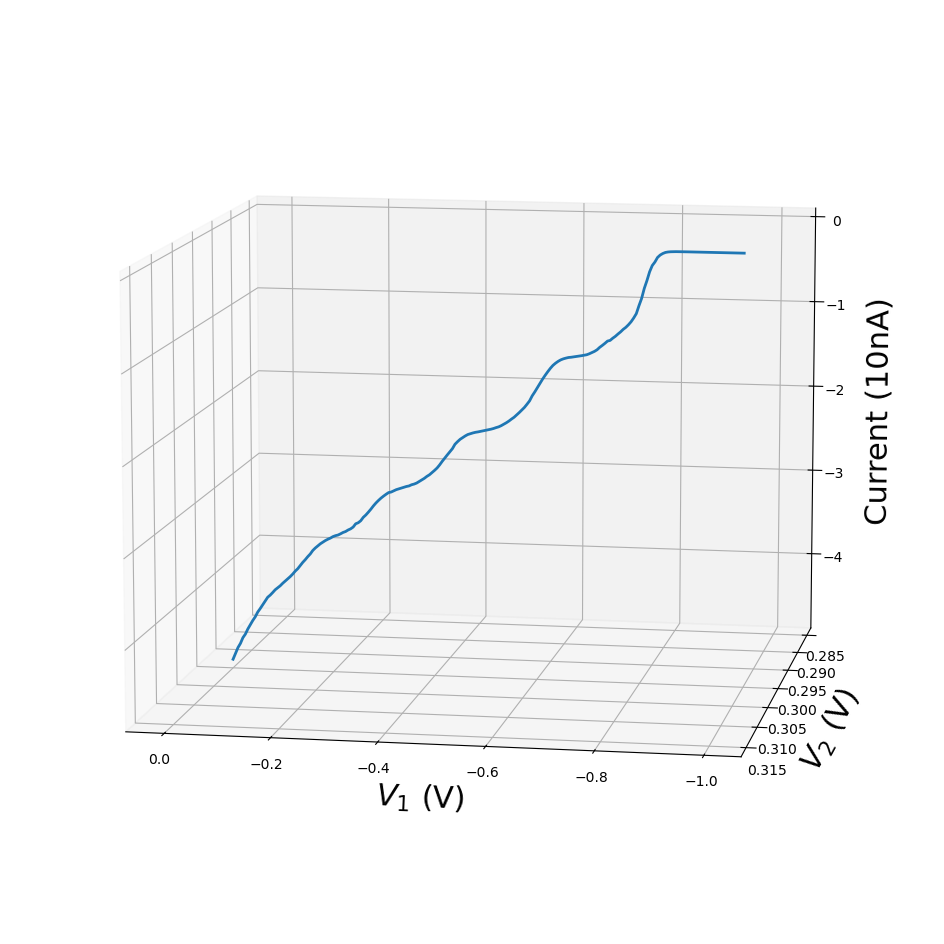

In [15]:
print('Line plot from xyz[2,199,:]')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# Create a line plot instead of surface plot
ax.plot(B[0,:], D[0,:], xyz[2,199,:], linewidth=2)  # Assuming B and D are 2D arrays

ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_iv_line_10elev_100azim.pdf')
plt.show()
plt.close()

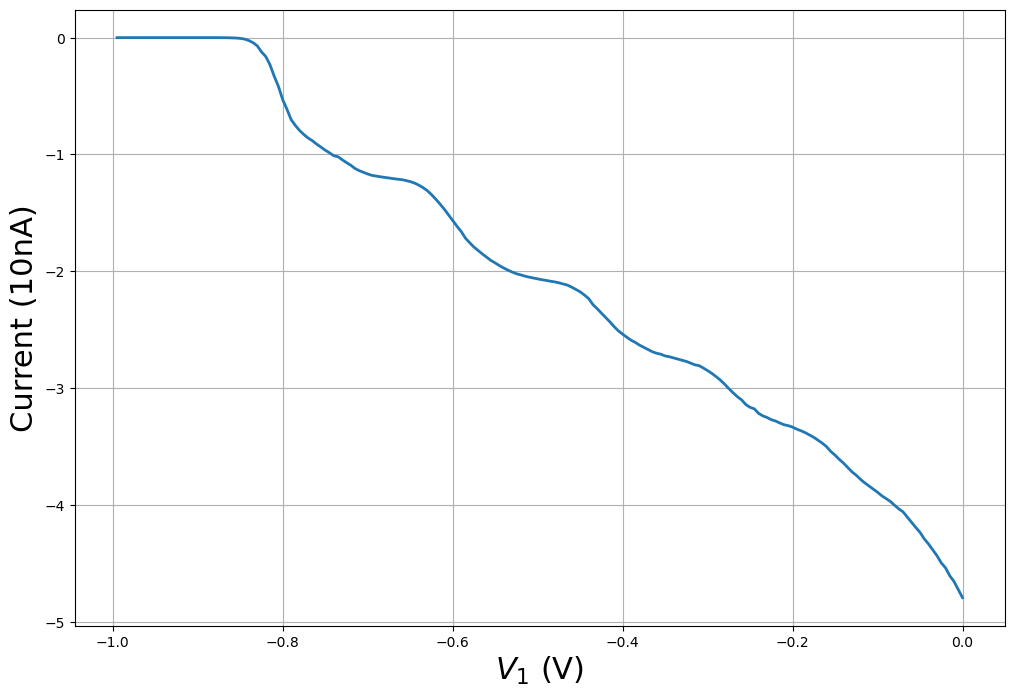

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(B[0,:], xyz[2,199,:], linewidth=2)  # Using B[0,:] as x-axis values
# or if you want to use index as x-axis:
#plt.plot(range(200), xyz[2,199,:], linewidth=2)

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.savefig('fig_iv_2D.pdf')
plt.show()
plt.close()

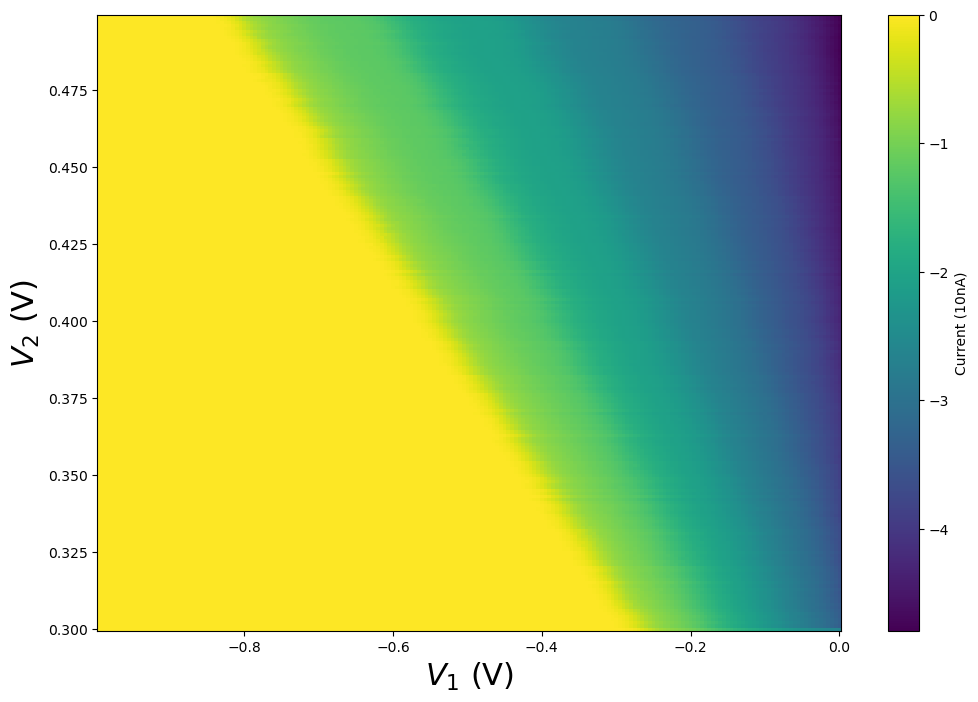

In [27]:
plt.figure(figsize=(12, 8))
plt.pcolormesh(B, D, xyz[2,:,:], shading='auto')
plt.colorbar(label='Current (10nA)')
plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('$V_2$ (V)', fontsize=22)
plt.savefig('fig_iv_2D_heatmap.pdf')
plt.show()
plt.close()

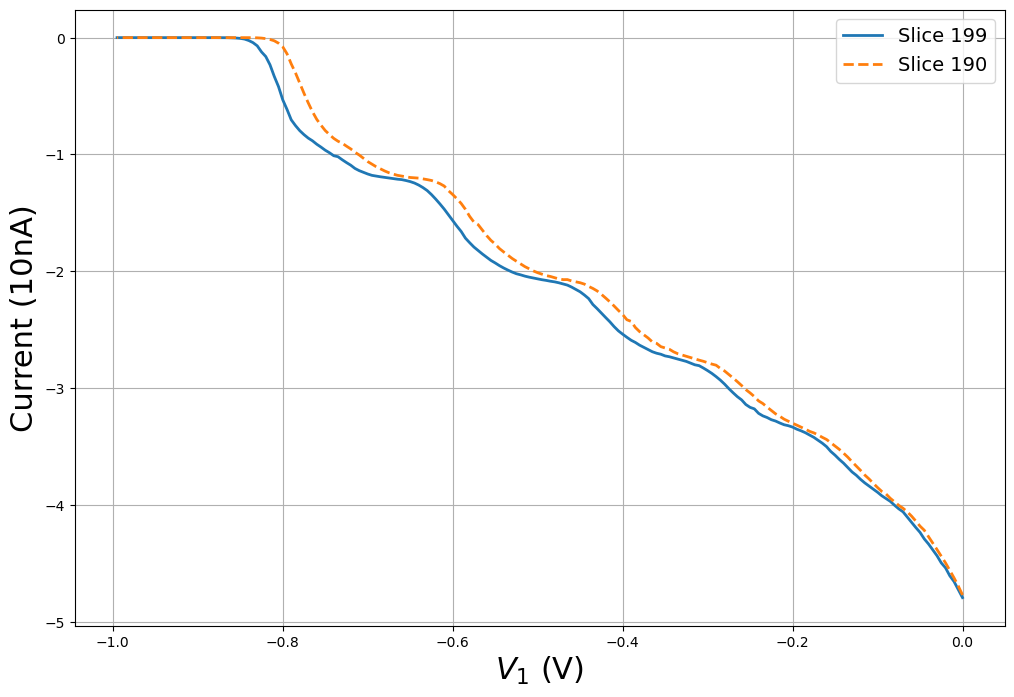

In [29]:
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(B[0,:], xyz[2,199,:], linewidth=2, label='Slice 199')  
plt.plot(B[0,:], xyz[2,190,:], linewidth=2, label='Slice 190', linestyle='--')  # Using dashed line for second plot

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=14)  # Add legend to distinguish the lines
plt.savefig('fig_iv_2D_comparison.pdf')
plt.show()
plt.close()

In [33]:
# Create array for averages
zavgexpij = np.zeros((200, 200))  # 2D array since we're averaging across experiments
nexp = 14

# Calculate average using sum()
for i in range(200):
    for j in range(200):
        zavgexpij[i, j] = sum(xyz[:, i, j])/nexp  # Using sum() instead of np.mean()

print('\nzavgexpij array (first 3 rows x 4 columns):')
print(zavgexpij[:3, :4])



zavgexpij array (first 3 rows x 4 columns):
[[-2.902238   -2.8651195  -2.82351857 -2.78178457]
 [-3.26702886 -3.18293471 -3.11441893 -3.05159057]
 [-3.27528229 -3.19609814 -3.12560057 -3.06005757]]


In [35]:
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = (xyz[iexp, :, :]-zavgexpij[:, :])**2
print('tmp[:, :3, :4]')
print(tmp[:, :3, :4])
varexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        varexpij[i, j] = sum(tmp[:, i, j])/nexp
print('varexpij[:3, :4]')
print(varexpij[:3, :4])

tmp[:, :3, :4]
[[[1.86936034e-01 1.41460613e-01 1.17703494e-01 9.89633627e-02]
  [5.52813493e-05 2.79236755e-05 1.92634572e-06 2.18409346e-05]
  [1.06882291e-05 9.64744903e-05 2.04020413e-04 4.75351152e-05]]

 [[5.52141905e-02 4.39088975e-02 3.75714534e-02 3.26017588e-02]
  [5.33866123e-03 5.74886737e-03 5.40578908e-03 4.62745893e-03]
  [3.18228151e-03 4.72901818e-03 4.27460044e-03 4.39800133e-03]]

 [[7.14444787e-02 6.18753188e-02 5.24366818e-02 4.76992464e-02]
  [1.11752686e-02 9.52757266e-03 8.59979347e-03 7.66787941e-03]
  [4.05243190e-03 2.51962407e-03 4.88620972e-03 4.63385553e-03]]

 [[2.23137869e-02 1.92664116e-02 1.74410510e-02 1.54675416e-02]
  [5.27078074e-03 4.55331904e-03 4.74074545e-03 4.32864366e-03]
  [4.35675432e-03 4.63214415e-03 4.12464878e-03 3.95306802e-03]]

 [[1.65681562e-03 1.62090786e-03 1.57922218e-03 1.38781794e-03]
  [1.19659658e-03 1.44276255e-03 1.65290453e-03 1.88882127e-03]
  [1.84550023e-03 2.18193087e-03 1.87719179e-03 1.56614670e-03]]

 [[2.19836964e-

In [37]:
nexp=14
tmp = np.zeros((nexp, 200, 200))
for iexp in range(3):
    tmp[iexp, :, :] = ((xyz[iexp, :, :]-zavgexpij[:, :]))**2
savgexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        savgexpij[i, j] = np.sqrt(sum(tmp[:, i, j])/nexp)
print('savgexpij[[:3,:4]')
print(savgexpij[:3,:4])
print('savgexpij[197:199,197:199]')
print(savgexpij[197:199,197:199])

savgexpij[[:3,:4]
[[0.14966503 0.13289223 0.12180536 0.1131574 ]
 [0.03440225 0.0330631  0.03163126 0.0296614 ]
 [0.02274926 0.02290527 0.02586342 0.02546621]]
savgexpij[197:199,197:199]
[[2.17794404e-06 2.31068945e-06]
 [2.90796634e-06 9.58885103e-07]]


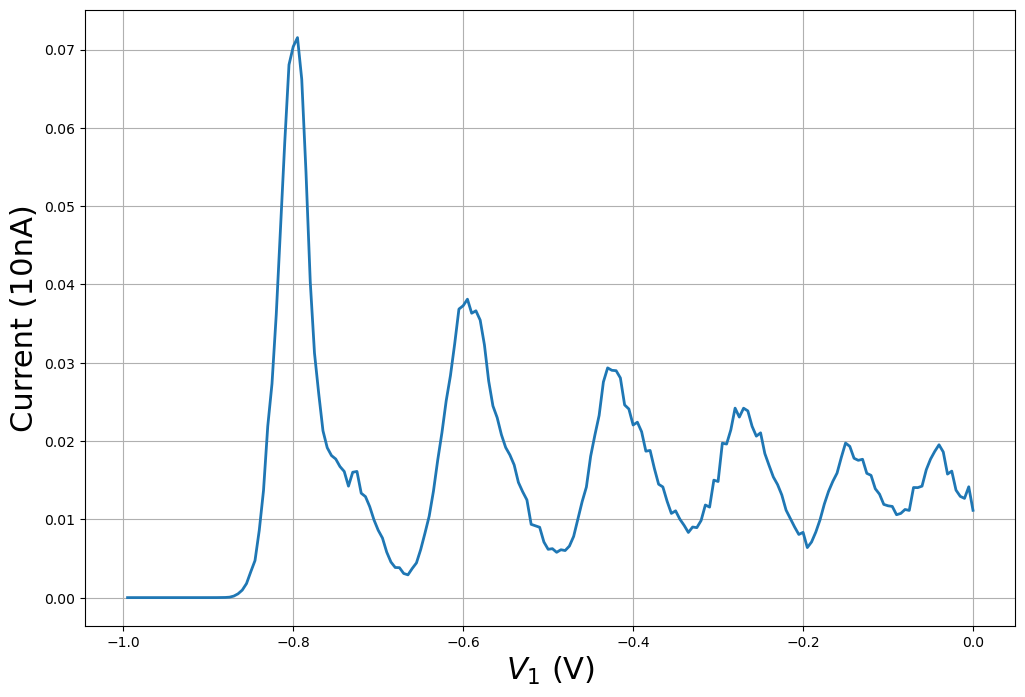

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(B[0,:], savgexpij[199,:], linewidth=2)  # Using B[0,:] as x-axis values
# or if you want to use index as x-axis:
#plt.plot(range(200), xyz[2,199,:], linewidth=2)

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.savefig('fig_iv_2D.pdf')
plt.show()
plt.close()

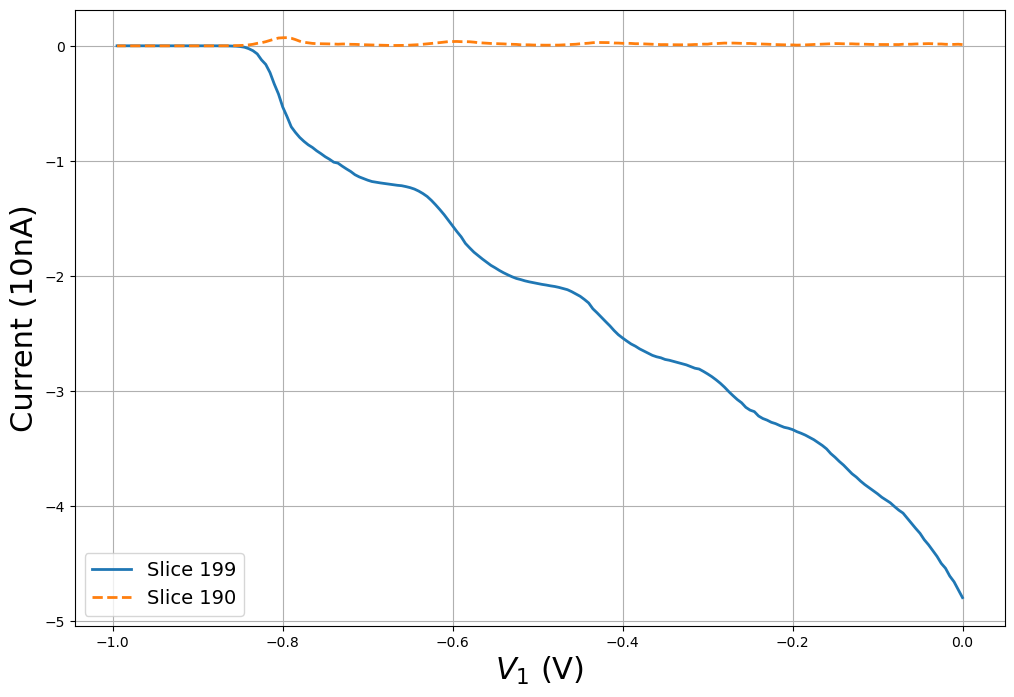

In [41]:
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(B[0,:], xyz[2,199,:], linewidth=2, label='Slice 199')  
plt.plot(B[0,:], savgexpij[199,:], linewidth=2, label='Slice 190', linestyle='--')  # Using dashed line for second plot

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=14)  # Add legend to distinguish the lines
plt.savefig('fig_iv_2D_comparison.pdf')
plt.show()
plt.close()

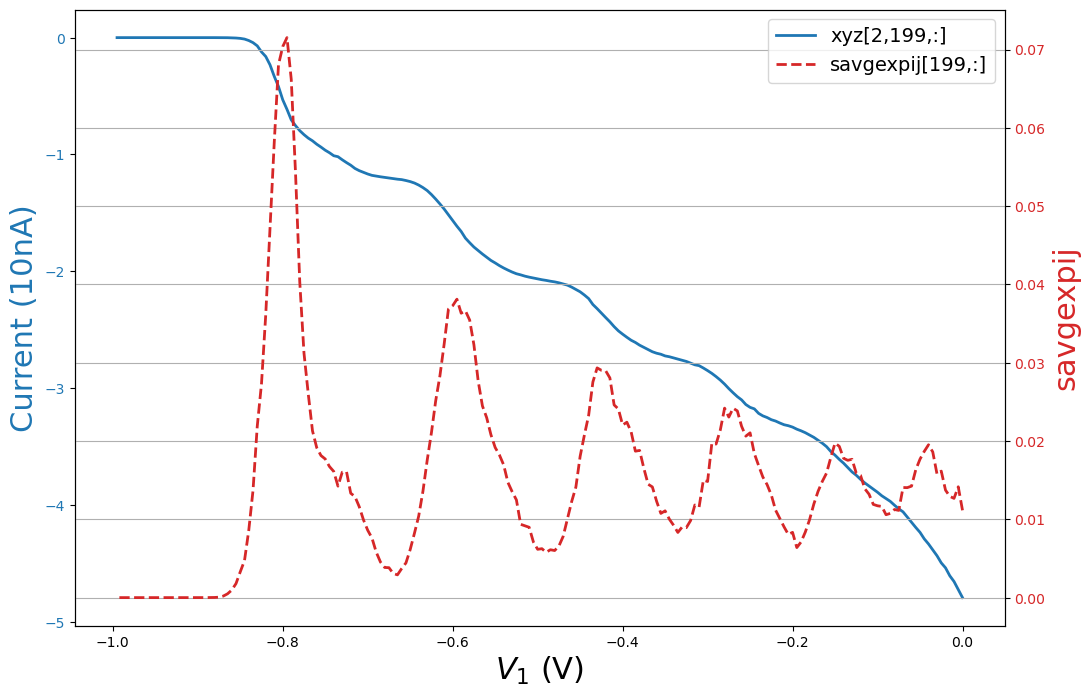

In [43]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot xyz data on primary y-axis
color1 = 'tab:blue'
ax1.plot(B[0,:], xyz[2,199,:], color=color1, linewidth=2, label='xyz[2,199,:]')
ax1.set_xlabel('$V_1$ (V)', fontsize=22)
ax1.set_ylabel('Current (10nA)', fontsize=22, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis and plot savgexpij data
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(B[0,:], savgexpij[199,:], color=color2, linewidth=2, linestyle='--', label='savgexpij[199,:]')
ax2.set_ylabel('savgexpij', fontsize=22, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add legend
# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.grid(True)
plt.savefig('fig_iv_2D_dual_axis.pdf')
plt.show()
plt.close()